In [3]:
import json
from os import walk
from os.path import isfile, join
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [27]:
filepath = "/Users/matt/repos/thermal_state_prep/numerics/data/two_level/kill_diagonals3.json"
with open(filepath) as f:
    j = json.load(f)
    inputs = j["inputs"]
    outputs = j["outputs"]
    num_samples = j["num_samples"]
    dim_sys = j["dim_sys"]
    label = j["label"]
    if len(inputs) != len(outputs):
        raise Exception("inputs and outputs are not the same length.")
    print("len of inputs: ", len(inputs))
alphas, beta_envs, epsilons, times = set(), set(), set(), set()
for (alpha, beta_env, beta_sys, time) in inputs:
    alphas.add(alpha)
    beta_envs.add(beta_env)
    epsilons.add(beta_sys)
    times.add(time)
alphas = list(alphas)
alphas.sort()
beta_envs = list(beta_envs)
beta_envs.sort()
epsilons = list(epsilons)
epsilons.sort()
times = list(times)
times.sort()

print("alphas")
print(alphas)
print("beta_envs")
print(beta_envs)
print("epsilons")
print(epsilons)
print("times")
print(times)
    

len of inputs:  1
alphas
[0.001]
beta_envs
[2.0]
epsilons
[0.05]
times
[80.3]


beta_env, beta_sys, time 0.001 0.05 80.3
std dist:  0.0018588854536902093


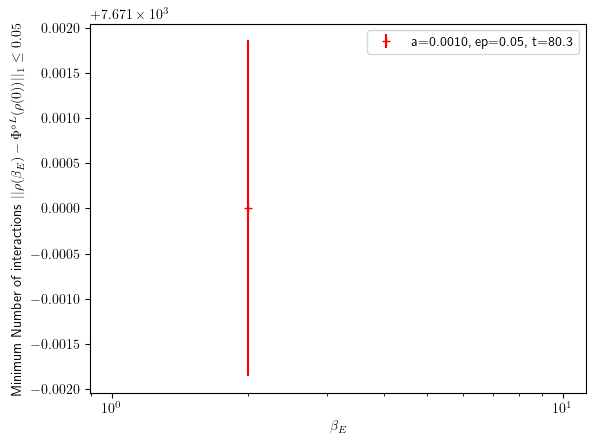

In [29]:

import matplotlib


fixed_params = [(alphas[0], epsilons[0], times[ix]) for ix in range(len(times))]
fig = plt.figure()
colors = ['r', 'b', 'g', 'black', 'orange']
color_count = 0
for ( alpha_0, epsilon_0, time_0) in fixed_params:
    print("beta_env, beta_sys, time", alpha_0, epsilon_0, time_0)
    x = []
    y = []
    yerr = []
    for ix in range(len(inputs)):
        (alpha, beta_env, epsilon, time) = inputs[ix]
        (num_interactions, mean_dist, std_dist, dist_of_mean) = outputs[ix]
        if alpha == alpha_0 and epsilon == epsilon_0 and time == time_0:
            x.append(beta_env)
            y.append(num_interactions)

            # print("beta_env, num_interactions = ", beta_env, ", ", num_interactions, ", std_dist = ", std_dist)
    plt.plot(x, y, marker='x', linestyle='none', label="a={:.4f}, ep={:.2f}, t={:.1f}".format
    (alpha_0, epsilon_0, time_0), color=colors[color_count])
    print('std dist: ', std_dist)
    # plt.errorbar(x, y, std_dist, marker='+', linestyle='none', label="a={:.4f}, ep={:.2f}, t={:.1f}".format
    # (alpha_0, epsilon_0, time_0), color=colors[color_count])
    color_count += 1
plt.xscale('log')
# plt.yscale('log')
matplotlib.rcParams['text.usetex'] = True
plt.xlabel("$\\beta_{E}$")
plt.ylabel("Minimum Number of interactions $|| \\rho(\\beta_E) - \\Phi^{\\circ L}(\\rho(0))||_1 \\leq 0.05$")
# $ - $
plt.legend()
plt.show()

beta_env, beta_sys, time 0.0020000000000000005 0.05 50.0
beta_env, num_interactions =  0.5 ,  2373 , std_dist =  0.0
beta_env, num_interactions =  0.5853899568613897 ,  2736 , std_dist =  0.0
beta_env, num_interactions =  0.6853628031883593 ,  3137 , std_dist =  0.0
beta_env, num_interactions =  0.8024090035856696 ,  3545 , std_dist =  0.0
beta_env, num_interactions =  0.9394443439884115 ,  3993 , std_dist =  0.0
beta_env, num_interactions =  1.0998825680021054 ,  4366 , std_dist =  0.0
beta_env, num_interactions =  1.287720418070694 ,  4685 , std_dist =  0.0
beta_env, num_interactions =  1.5076371999678686 ,  4936 , std_dist =  0.0
beta_env, num_interactions =  1.7651113509036338 ,  5004 , std_dist =  0.0
beta_env, num_interactions =  2.066556915122055 ,  4896 , std_dist =  0.0
beta_env, num_interactions =  2.419483326789812 ,  4575 , std_dist =  0.0
beta_env, num_interactions =  2.83268248059268 ,  4162 , std_dist =  0.0
beta_env, num_interactions =  3.3164477502323266 ,  3652 , std_

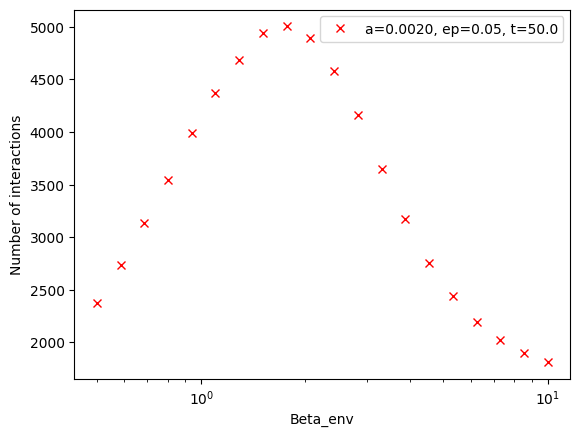

In [10]:

fixed_params = [(alphas[0], epsilons[0], times[ix]) for ix in range(len(times))]
fig = plt.figure()
colors = ['r', 'b', 'g', 'black', 'orange']
color_count = 0
for ( alpha_0, epsilon_0, time_0) in fixed_params:
    print("beta_env, beta_sys, time", alpha_0, epsilon_0, time_0)
    x = []
    y = []
    yerr = []
    for ix in range(len(inputs)):
        (alpha, beta_env, epsilon, time) = inputs[ix]
        (num_interactions, mean_dist, std_dist, dist_of_mean) = outputs[ix]
        if alpha == alpha_0 and epsilon == epsilon_0 and time == time_0:
            x.append(beta_env)
            y.append(num_interactions)

            print("beta_env, num_interactions = ", beta_env, ", ", num_interactions, ", std_dist = ", std_dist)
    plt.plot(x, y, marker='x', linestyle='none', label="a={:.4f}, ep={:.2f}, t={:.1f}".format(alpha_0, epsilon_0, time_0), color=colors[color_count])
    color_count += 1
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("Beta_env")
plt.ylabel("Number of interactions")
plt.legend()
plt.show()